# Project Definition
CORD-19 is a collection of scientific articles related to COVID-19, maintained by the Semantic Scholar team at the Allen Institute to support text mining and natural language processing research. The dataset was introduced in a paper titled "CORD-19: The COVID-19 Open Research Dataset," authored by the team responsible for its curation


## Project objectives

The project aims to address the increasing challenges posed by the high volume and continuously growing online textual data of the CORD-19 dataset, coupled with the limitations of human reading capacity. In this endeavor, the focus is on employing topic modeling and clustering systems to enhance data comprehension. The objective is to cluster the 19-COVID dataset and extract meaningful relationships between its articles, organizing them based on identified topics

#### References:
* https://aclanthology.org/2020.nlpcovid19-acl.1/
* https://link.springer.com/article/10.1007/s41870-023-01268-w

## Road Map
Based on the mentioned articles above, the project road map is as follows:

1- Preprocessing
*  Stop word removal
* Lemma
* Stemming

2- Feature Extraction
* Word Embedding
* TF-IDF

3- Topic Modeling
* LDA
* BERT
* LDA-BERT

4- Dimensionality reduction
* PCA
* t-SNE
* UMAP

5- Topic Clustering
* K-means

### Importing modules and dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import csv

#import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('Dataset/all_sources_metadata_2020-03-13.csv')
df.head()

### Preprocessing dataset

In [3]:
df.info()

In [ ]:
#drop useless features
drop_list = ['sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'publish_time', 'authors',
             'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text']
df.drop(drop_list, axis=1, inplace=True)
df.head()

,title,abstract,journal
0,Angiotensin-converting enzyme 2 (ACE2) as a SA...,NaN,Intensive Care Med
1,Comparative genetic analysis of the novel coro...,NaN,Cell Discovery
2,Incubation Period and Other Epidemiological Ch...,The geographic spread of 2019 novel coronaviru...,Journal of Clinical Medicine
3,Characteristics of and Public Health Responses...,"In December 2019, cases of unidentified pneumo...",J Clin Med
4,Imaging changes in severe COVID-19 pneumonia,NaN,Intensive Care Med


In [ ]:
# drop missing values
df.dropna(inplace=True)
df.head()

,title,abstract,journal
2,Incubation Period and Other Epidemiological Ch...,The geographic spread of 2019 novel coronaviru...,Journal of Clinical Medicine
3,Characteristics of and Public Health Responses...,"In December 2019, cases of unidentified pneumo...",J Clin Med
5,An updated estimation of the risk of transmiss...,The basic reproduction number of an infectious...,Infectious Disease Modelling
6,Real-time forecasts of the 2019-nCoV epidemic ...,The initial cluster of severe pneumonia cases ...,Infectious Disease Modelling
8,COVID-19 outbreak on the Diamond Princess crui...,Cruise ships carry a large number of people in...,Journal of Travel Medicine


In [ ]:
# removing stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
for i in df.columns.to_numpy():
    arr = []
    for text in df[i]:
        filtered_text = remove_stopwords(text)
        arr.append(filtered_text)
    col = 'new'+i
    df[col] = arr
    arr = []
df.head()

,title,abstract,journal,newtitle,newabstract,newjournal
2,Incubation Period and Other Epidemiological Ch...,The geographic spread of 2019 novel coronaviru...,Journal of Clinical Medicine,Incubation Period Epidemiological Characterist...,geographic spread 2019 novel coronavirus ( COV...,Journal Clinical Medicine
3,Characteristics of and Public Health Responses...,"In December 2019, cases of unidentified pneumo...",J Clin Med,Characteristics Public Health Responses Corona...,"December 2019 , cases unidentified pneumonia h...",J Clin Med
5,An updated estimation of the risk of transmiss...,The basic reproduction number of an infectious...,Infectious Disease Modelling,updated estimation risk transmission novel cor...,basic reproduction number infectious agent ave...,Infectious Disease Modelling
6,Real-time forecasts of the 2019-nCoV epidemic ...,The initial cluster of severe pneumonia cases ...,Infectious Disease Modelling,Real-time forecasts 2019-nCoV epidemic China F...,initial cluster severe pneumonia cases trigger...,Infectious Disease Modelling
8,COVID-19 outbreak on the Diamond Princess crui...,Cruise ships carry a large number of people in...,Journal of Travel Medicine,COVID-19 outbreak Diamond Princess cruise ship...,Cruise ships carry large number people confine...,Journal Travel Medicine


In [ ]:
df.drop(['title', 'abstract', 'journal'], axis=1, inplace=True)

In [ ]:
# lemmetize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

In [ ]:
for i in df.columns.to_numpy():
    arr = []
    for text in df[i]:
        filtered_text = lemmatize_text(text)
        arr.append(filtered_text)
    col = 'lemm_'+i
    df[col] = arr
    arr = []
df.head()

,newtitle,newabstract,newjournal,lemm_newtitle,lemm_newabstract,lemm_newjournal
2,Incubation Period Epidemiological Characterist...,geographic spread 2019 novel coronavirus ( COV...,Journal Clinical Medicine,Incubation Period Epidemiological Characterist...,geographic spread 2019 novel coronavirus ( COV...,Journal Clinical Medicine
3,Characteristics Public Health Responses Corona...,"December 2019 , cases unidentified pneumonia h...",J Clin Med,Characteristics Public Health Responses Corona...,"December 2019 , case unidentified pneumonia hi...",J Clin Med
5,updated estimation risk transmission novel cor...,basic reproduction number infectious agent ave...,Infectious Disease Modelling,updated estimation risk transmission novel cor...,basic reproduction number infectious agent ave...,Infectious Disease Modelling
6,Real-time forecasts 2019-nCoV epidemic China F...,initial cluster severe pneumonia cases trigger...,Infectious Disease Modelling,Real-time forecast 2019-nCoV epidemic China Fe...,initial cluster severe pneumonia case triggere...,Infectious Disease Modelling
8,COVID-19 outbreak Diamond Princess cruise ship...,Cruise ships carry large number people confine...,Journal Travel Medicine,COVID-19 outbreak Diamond Princess cruise ship...,Cruise ship carry large number people confined...,Journal Travel Medicine


In [ ]:
df.drop(['newtitle', 'newabstract', 'newjournal'], axis=1, inplace=True)

In [ ]:
#stem text
def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
for i in df.columns.to_numpy():
    arr = []
    for text in df[i]:
        filtered_text = stem_text(text)
        arr.append(filtered_text)
    col = 'stemm_'+i
    df[col] = arr
    arr = []
df.head()

,lemm_newtitle,lemm_newabstract,lemm_newjournal,stemm_lemm_newtitle,stemm_lemm_newabstract,stemm_lemm_newjournal
2,Incubation Period Epidemiological Characterist...,geographic spread 2019 novel coronavirus ( COV...,Journal Clinical Medicine,incub period epidemiolog characterist 2019 nov...,geograph spread 2019 novel coronaviru ( covid-...,journal clinic medicin
3,Characteristics Public Health Responses Corona...,"December 2019 , case unidentified pneumonia hi...",J Clin Med,characterist public health respons coronaviru ...,"decemb 2019 , case unidentifi pneumonia histor...",J clin med
5,updated estimation risk transmission novel cor...,basic reproduction number infectious agent ave...,Infectious Disease Modelling,updat estim risk transmiss novel coronaviru ( ...,basic reproduct number infecti agent averag nu...,infecti diseas model
6,Real-time forecast 2019-nCoV epidemic China Fe...,initial cluster severe pneumonia case triggere...,Infectious Disease Modelling,real-tim forecast 2019-ncov epidem china febru...,initi cluster sever pneumonia case trigger 201...,infecti diseas model
8,COVID-19 outbreak Diamond Princess cruise ship...,Cruise ship carry large number people confined...,Journal Travel Medicine,covid-19 outbreak diamond princess cruis ship ...,cruis ship carri larg number peopl confin spac...,journal travel medicin


In [ ]:
df.drop(['lemm_newtitle', 'lemm_newabstract', 'lemm_newjournal'], axis=1, inplace=True)

In [ ]:
df.head()

,stemm_lemm_newtitle,stemm_lemm_newabstract,stemm_lemm_newjournal
2,incub period epidemiolog characterist 2019 nov...,geograph spread 2019 novel coronaviru ( covid-...,journal clinic medicin
3,characterist public health respons coronaviru ...,"decemb 2019 , case unidentifi pneumonia histor...",J clin med
5,updat estim risk transmiss novel coronaviru ( ...,basic reproduct number infecti agent averag nu...,infecti diseas model
6,real-tim forecast 2019-ncov epidem china febru...,initi cluster sever pneumonia case trigger 201...,infecti diseas model
8,covid-19 outbreak diamond princess cruis ship ...,cruis ship carri larg number peopl confin spac...,journal travel medicin


### Feature Extraction
* We should merge features before using TF-IDF or Word2Vec method

In [ ]:
# using TF-IDF methods to extract features from text
arr1 = df['stemm_lemm_newtitle'].to_numpy()
arr2 = df['stemm_lemm_newabstract'].to_numpy()
arr3 = df['stemm_lemm_newjournal'].to_numpy()

doc = []
for i in range(len(arr1)):
  temp = arr1[i]
  temp += arr2[i]
  temp += arr3[i]
  doc.append(temp)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
dense_matrix = tfidf_matrix.todense()
tfidf_df = pd.DataFrame(dense_matrix)
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,56999,57000,57001,57002,57003,57004,57005,57006,57007,57008
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df[0].unique()

array([0.        , 0.1111884 , 0.09306149, 0.06668436, 0.03303938,
       0.12150753, 0.32031271, 0.2536562 , 0.25924276, 0.25859038,
       0.04906093, 0.04514837, 0.32122809, 0.05615239, 0.21458192,
       0.04635317, 0.10896002, 0.04568512, 0.06413243, 0.05562906,
       0.04997072, 0.03663051, 0.12899203, 0.05716455, 0.09252523,
       0.10517497, 0.04964771, 0.03932645, 0.0540495 , 0.04206109,
       0.0565619 , 0.07318454, 0.05698691, 0.07594594, 0.35081922,
       0.14155377, 0.63668938, 0.08113058, 0.19686252, 0.0548222 ,
       0.07377423, 0.05230996, 0.13676307, 0.06236195, 0.04617596,
       0.05855917, 0.04839561, 0.07459291, 0.06985514, 0.05221823,
       0.0605988 , 0.05906157, 0.04821922, 0.05731477, 0.06643597,
       0.0353855 , 0.04234553, 0.05936777, 0.05678159, 0.07713091,
       0.03243252, 0.11215783, 0.05278605, 0.05441162, 0.03964521,
       0.11075781, 0.05651151, 0.15955282, 0.06740489, 0.0599988 ,
       0.10564975, 0.0669957 ])

In [5]:
#merge values
def merge_values(df):
    arr1 = df['stemm_lemm_newtitle'].to_numpy()
    arr2 = df['stemm_lemm_newabstract'].to_numpy()
    arr3 = df['stemm_lemm_newjournal'].to_numpy()
    arr = []
    for i in range(len(df)):
      temp = []
      a1 = arr1[i].split(' ')
      for j in a1:
        temp.append(j)
      a2 = arr2[i].split(' ')
      for j in a2:
        temp.append(j)
      a3 = arr3[i].split(' ')
      for j in a3:
        temp.append(j)
      arr.append(temp)
    return arr
merged_arr = merge_values(df)
print(len(merged_arr))

16591


In [6]:
# Create a Word2Vec instance
model = Word2Vec(sentences=merged_arr, vector_size=100, window=5, min_count=1, workers=4)

# Train the model
model.train(merged_arr, total_examples=len(merged_arr), epochs=10, report_delay=1)

(26245824, 31162370)

In [7]:
def get_sentence_vector(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        avg_vector = np.mean(vectors, axis=0)
    else:
        avg_vector = np.zeros(model.vector_size)
    return avg_vector

In [8]:
word2vec_words = []
for i in range(0 , len(merged_arr)):
    word2vec_words.append(get_sentence_vector(merged_arr[i], model))

### Topic Modeling

In [9]:
#for LDA, we need to normalize our vectors because we have negative value
scaler = MinMaxScaler()
normalized_vectors = scaler.fit_transform(word2vec_words)

In [10]:
# Train LDA on the document vectors
lda_model = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='online', batch_size=128)
lda_result = lda_model.fit_transform(normalized_vectors)

In [12]:
# Train LDA for topic modeling on document words (10 topics)
arr1 = df['stemm_lemm_newtitle'].to_numpy()
arr2 = df['stemm_lemm_newabstract'].to_numpy()
arr3 = df['stemm_lemm_newjournal'].to_numpy()


doc = np.append(arr1,arr2)
doc = np.append(doc,arr3)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(doc)

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='online', batch_size=128)
lda_model.fit(X)

# Print the topics
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]])}")


Topic #1: viru, infect, one, host, mous, demonstr, day, di, predict, ifn
Topic #2: health, differ, emerg, sampl, plo, public, import, structur, replic, bind
Topic #3: cell, result, infect, viru, diseas, suggest, infecti, respons, treatment, human
Topic #4: vaccin, specif, cov, immun, effect, time, respons, anim, mechan, syndrom
Topic #5: protein, gene, express, interact, drug, complex, involv, hiv, transcript, target
Topic #6: sequenc, genom, level, use, type, analysi, observ, signific, bat, data
Topic #7: studi, use, associ, method, identifi, report, may, system, human, high
Topic #8: patient, respiratori, case, clinic, infect, present, test, data, diseas, well
Topic #9: activ, develop, rna, viral, detect, assay, virus, antivir, pcr, need
Topic #10: influenza, signal, pandem, symptom, remain, lead, h1n1, season, work, mrna


### Dimensionality reduction

* I prefer to use PCA and I think that is enough, you can use another methods and compare the results :))

In [13]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(lda_result)

# Print the PCA results
print("PCA Result:")
print(pca_result)

PCA Result:
[[-0.32981746 -0.38490289]
 [-0.41549027  0.1667764 ]
 [-0.59403749  0.66685136]
 ...
 [-0.33893064 -0.04829556]
 [-0.59411567  0.66699   ]
 [-0.59429826  0.66731374]]


### Topic Clustering

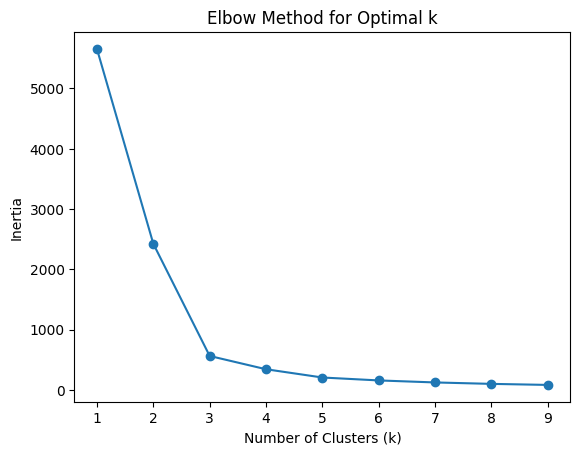

In [14]:
#Use the elbow method to find the optimal number of clusters
inertia_values = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia_values.append(kmeans.inertia_)

#Plot the elbow curve
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [15]:
#Creating evaluate function to evaluate our models performance
def evaluate(model, data, silhouette_visualizer=True):
  """
  Plotting Silhouette Diagram or Silhouette Visualizer, print Silhouette Score and Davies Bouldin Score to evaluate your model performance.

  Parameters:
  model : pass your estimator with model argument to this function.
  data : data is your dataframe which is going to be trained.
  silhouette_visualizer : defualt is False, you can plot silhouette diagram by passing True.
  """
  if silhouette_visualizer:
    from yellowbrick.cluster import SilhouetteVisualizer

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(data)

  y = model.fit_predict(data)


  SC = "Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(data, y)))
  DBC = "Davies Bouldin Score"+" : "+str("{:.2f}".format(davies_bouldin_score(data, y)))


  print(SC)
  print(DBC)

Note:
* if **Silhouette Score** is closer to 1, the model is better. but if it is closer to -1 the model is worse.

* if **Davies Bouldin Score** is closer to 0, the model is better. but if it is closer to 1 the model is worse. :))

I will use 2 models for clustering:
* K-means
* Agglomerative HC

Cluster labels: [4 6 2 ... 6 2 2]
Silhouette Score : 0.75
Davies Bouldin Score : 0.33


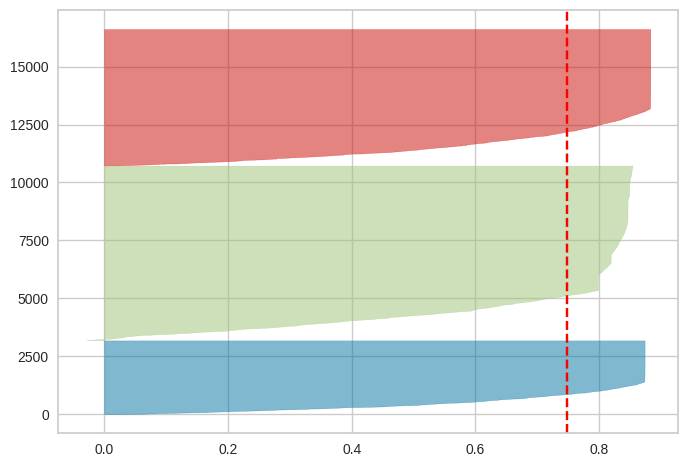

In [16]:
# Choose optimal number of clusters based on the elbow method
optimal_k = 3

# Apply K-means with the optimal number of clusters
kmeans3 = KMeans(n_clusters=optimal_k, random_state=42)
kmeans3.fit(pca_result)

cluster_labels = kmeans.labels_
print("Cluster labels:", cluster_labels)

evaluate(kmeans3, pca_result)

Cluster labels: [4 6 2 ... 6 2 2]
Silhouette Score : 0.72
Davies Bouldin Score : 0.41


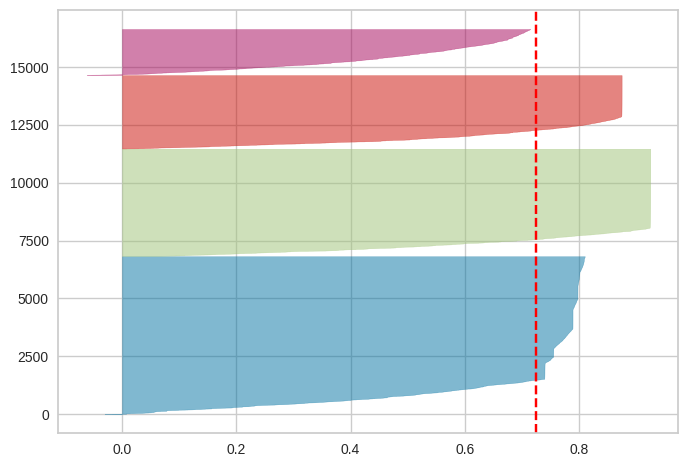

In [17]:
# Choose optimal number of clusters based on the elbow method
optimal_k = 4

# Apply K-means with the optimal number of clusters
kmeans4 = KMeans(n_clusters=optimal_k, random_state=42)
kmeans4.fit(pca_result)

cluster_labels = kmeans.labels_
print("Cluster labels:", cluster_labels)

evaluate(kmeans4, pca_result)

* According to results, k = 3 for kmeans is best one

In [ ]:
# Choose optimal number of clusters based on the elbow method
optimal_k = 3


# Apply Agglomerative with the optimal number of clusters
linkages = ["ward", "single", "average"]
for lk in linkages:
  hcluster3 = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage=lk)
  evaluate(hcluster3, pca_result, False)
  print('===========================')

Silhouette Score : 0.66
Davies Bouldin Score : 0.50
Silhouette Score : -0.37
Davies Bouldin Score : 4.36
Silhouette Score : 0.64
Davies Bouldin Score : 0.52


In [ ]:
# Choose optimal number of clusters based on the elbow method
optimal_k = 4


# Apply Agglomerative with the optimal number of clusters
linkages = ["ward", "single", "average"]
for lk in linkages:
  hcluster4 = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage=lk)
  evaluate(hcluster4, pca_result, False)
  print('===========================')

Silhouette Score : 0.60
Davies Bouldin Score : 0.59
Silhouette Score : -0.24
Davies Bouldin Score : 1.60
Silhouette Score : 0.58
Davies Bouldin Score : 0.53


In [21]:
#create plot model clustering function
def plot_model_clustering(model, data, title):
  data = pd.DataFrame(data)
  data.columns = ['PC1', 'PC2']
  plt.figure(figsize=(12,5))
  labels= model.labels_
  df_label=data.copy()
  df_label['labels']= labels
  ax = sns.scatterplot(x='PC1', y='PC2', hue='labels', data=df_label, palette='bright')
  ax.set_title(title)

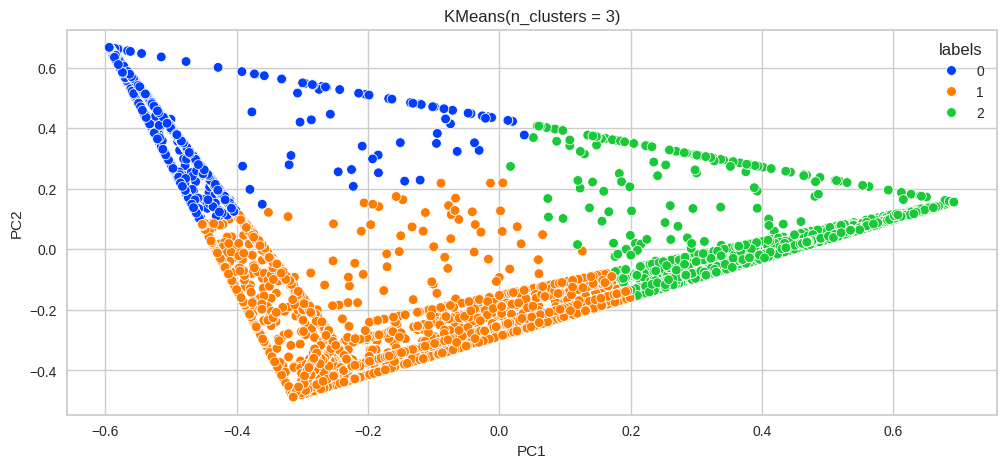

In [22]:
plot_model_clustering(kmeans3, pca_result, 'KMeans(n_clusters = 3)')

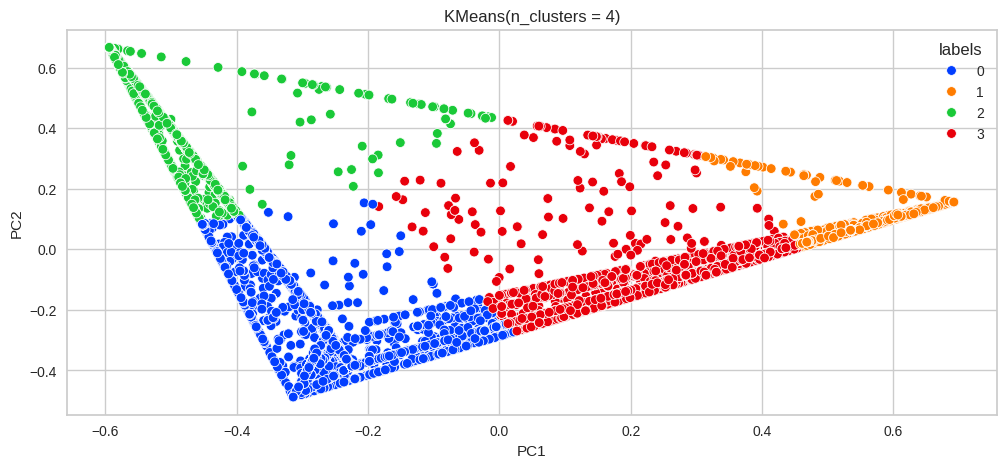

In [23]:
plot_model_clustering(kmeans4, pca_result, 'KMeans(n_clusters = 4)')

In [30]:
# model
lda_model = LatentDirichletAllocation(n_components=3, random_state=42, learning_method='online', batch_size=128)
lda_model.fit(X)

# Print the topics
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]])}")

Topic #1: cell, viru, infect, protein, viral, gene, express, activ, host, respons
Topic #2: respiratori, infect, patient, viru, detect, studi, clinic, sampl, cov, use
Topic #3: health, diseas, use, emerg, outbreak, influenza, one, data, plo, model


### Conclusion
* We found that K-means is the best :)))
* I decided to use word2vec for feature extraction because of **contextual understanding** and **semantic similarity**
* Each cluster can represent one of the topics that were mentioned above.